1.1 Subir el archivo

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer patient data sets.csv to cancer patient data sets.csv


1.2 Librerias Necesarias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

1.3 Leer el archivo y manejarlo con pandas

In [ ]:
df = pd.read_csv("cancer patient data sets.csv")

In [ ]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


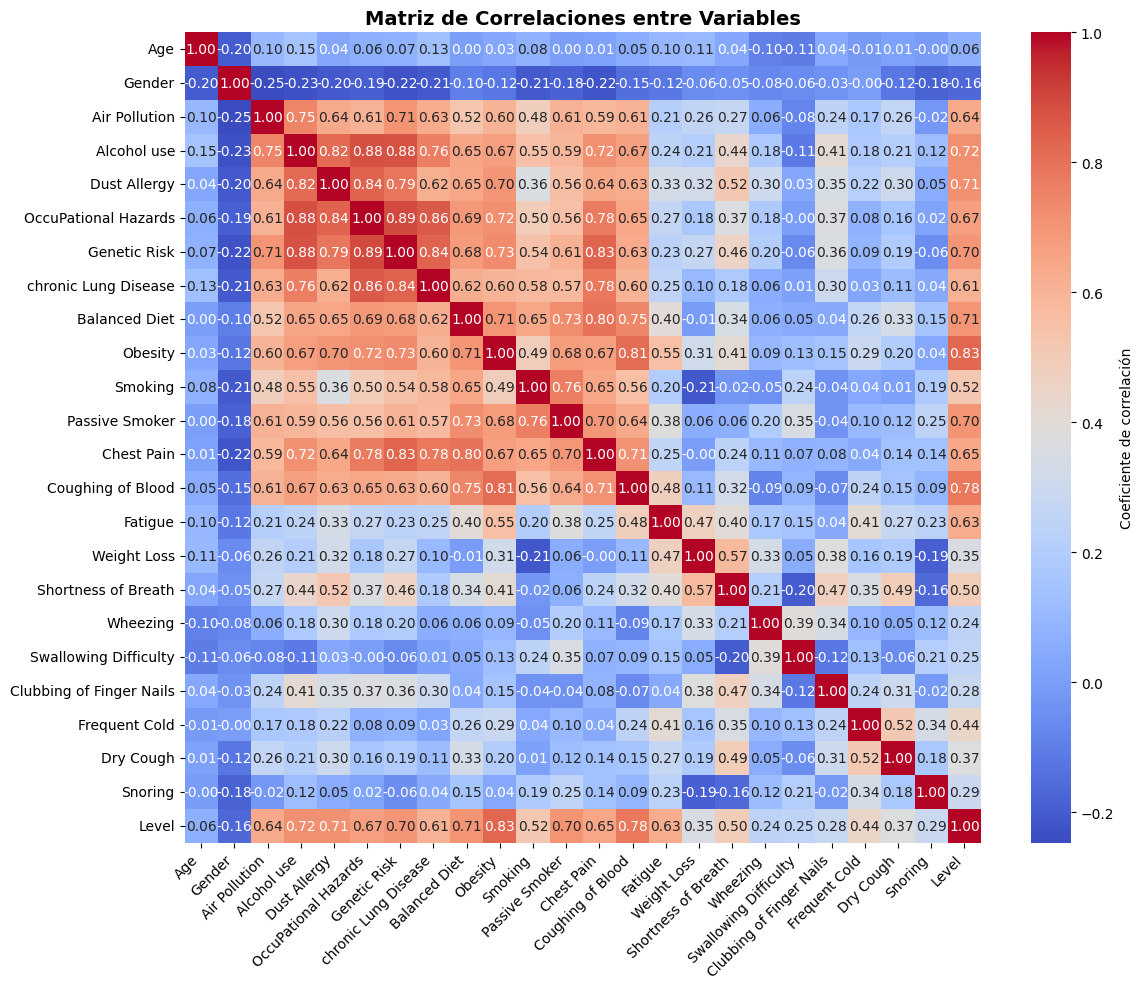

In [ ]:
matriz_corr = df.corr(numeric_only=True)


plt.figure(figsize=(12, 10))
sns.heatmap(
    matriz_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Coeficiente de correlación'})

plt.title("Matriz de Correlaciones entre Variables", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
print("\nCorrelaciones con respecto a la variable 'Level':\n")
print(matriz_corr['Level'].sort_values(ascending=False))


Correlaciones con respecto a la variable 'Level':

Level                       1.000000
Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Age                         0.060048
Gender                     -0.164985
Name: Level, dtype: float64



Correlaciones de cada variable con 'Level':

Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Age                         0.060048
Gender                     -0.164985
Name: Level, dtype: float64

 5 variables con mayor correlación positiva:
Obesity              0.827435

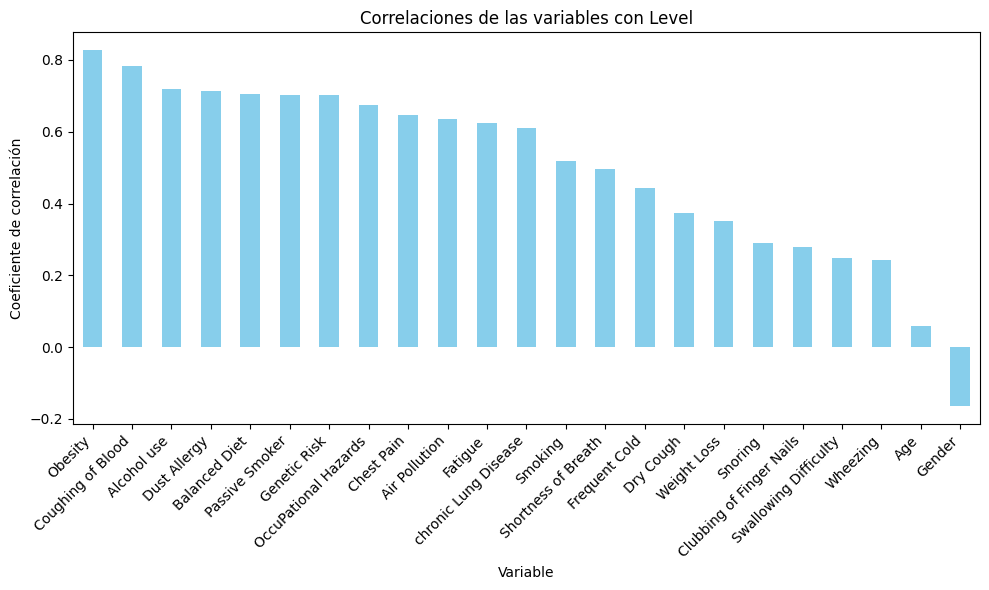

In [ ]:
corr_level = matriz_corr['Level'].drop('Level').sort_values(ascending=False)

print("\nCorrelaciones de cada variable con 'Level':\n")
print(corr_level)


print("\n 5 variables con mayor correlación positiva:")
print(corr_level.head(5))

print("\n 5 variables con mayor correlación negativa:")
print(corr_level.tail(5))


plt.figure(figsize=(10,6))
corr_level.plot(kind='bar', color='skyblue')
plt.title("Correlaciones de las variables con Level")
plt.xlabel("Variable")
plt.ylabel("Coeficiente de correlación")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1.4 Mapeo y preparamiento de datos

In [ ]:
df.drop(['index','Patient Id'], axis=1, inplace=True, errors='ignore')
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce').fillna(0)
df['Level'] = df['Level'].str.strip().map({'Low':0,'Medium':1,'High':2})
df = df.dropna()
X = df.drop('Level', axis=1).values.astype(float)
Y = df['Level'].values.astype(int).reshape(-1,1)

1.5 Estandarización

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.hstack([X, np.ones((X.shape[0],1))])

1.6 Separacion datos de prueba y entrenamiento

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42, stratify=Y)

1.7 definición de sigmoide

In [ ]:
def sigmoide(valor):
    return np.where(valor >= 0, 1 / (1 + np.exp(-valor)), np.exp(valor) / (1 + np.exp(valor)))

def safe_sigmoid(z):
    z_clipped = np.clip(z, -500, 500)
    return sigmoide(z_clipped)

1.8 Calculo de la entropia

In [ ]:
def calcular_error(parametros, X, Y):
    logits = X @ parametros
    prob = safe_sigmoid(logits)
    eps = 1e-12
    prob = np.clip(prob, eps, 1-eps)
    entropia = -(Y.T @ np.log(prob) + (1-Y).T @ np.log(1-prob)) / X.shape[0]
    return entropia.item()

1.9 Calculo del gradiente de la entropia

In [ ]:
def calcular_gradiente(parametros, X, Y):
    prob = safe_sigmoid(X @ parametros)
    grad = (X.T @ (prob - Y)) / X.shape[0]
    return grad

1.10 Criterio de paro

In [ ]:
def criterio_paro_norma_gradiente(grad, umbral):
    return np.linalg.norm(grad) < umbral

1.11 Calculo descenso del gradiente

In [ ]:
def descenso_gradiente(X, Y, parametros, lr, umbral, max_iter):
    iteracion = 0
    grad = calcular_gradiente(parametros, X, Y)
    resultados = []
    normas_gradiente = []

    while iteracion < max_iter and not criterio_paro_norma_gradiente(grad, umbral):
        xk = parametros.copy()
        parametros -= lr * grad
        xk1 = parametros.copy()
        grad = calcular_gradiente(parametros, X, Y)

        resultados.append({
            'Iteración': iteracion+1,
            '||xk+1 - xk||': float(np.linalg.norm(xk1 - xk)),
            '||∇f(xk)||': float(np.linalg.norm(grad)),
            'f(xk)': calcular_error(xk, X, Y)
        })
        normas_gradiente.append(np.linalg.norm(grad))
        iteracion += 1

    return parametros, resultados, normas_gradiente

1.12 Exactitud de las clasificaciones

In [ ]:
def calcular_exactitud(pred, etiquetas):
    return np.mean(pred.flatten() == etiquetas.flatten())

1.13 Evaluación del modelo

In [ ]:
def plot_confusion_matrix(cm, target_names, title='Matriz de Confusión', cmap=None, normalize=False):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5,5))
    if normalize:
        with np.errstate(all='ignore'):
            row_sums = cm.sum(axis=1)[:, np.newaxis]
            row_sums[row_sums==0] = 1
            cm_norm = cm.astype('float') / row_sums
        display_cm = cm_norm
    else:
        display_cm = cm

    plt.imshow(display_cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    thresh = display_cm.max() / 1.5 if normalize else display_cm.max()/2
    for i,j in itertools.product(range(display_cm.shape[0]), range(display_cm.shape[1])):
        texto = "{:0.4f}".format(display_cm[i,j]) if normalize else "{:,}".format(int(cm[i,j]))
        plt.text(j,i,texto,horizontalalignment="center",
                 color="white" if display_cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha\nexactitud={:0.4f}; error={:0.4f}'.format(accuracy, misclass))
    plt.show()

1.14 Entrenamiento y multiclase OvR

In [ ]:
clases = np.unique(Y_train)
thetas = {}
normas_clases = {}

lr = 0.01
umbral = 1e-6
max_iter = 10000

for c in clases:
    Y_bin = (Y_train==c).astype(int)
    theta_init = np.random.randn(X_train.shape[1],1)*0.01
    theta_opt, resultados, normas_grad = descenso_gradiente(X_train, Y_bin, theta_init, lr, umbral, max_iter)
    thetas[c] = theta_opt
    normas_clases[c] = normas_grad

1.15 Predicciones

In [ ]:
logits = np.zeros((X_test.shape[0], len(clases)))
for i,c in enumerate(clases):
   logits[:,i] = (X_test @ thetas[c]).flatten()

predicciones = np.argmax(logits, axis=1)

1.16 Exactitud y metricas de rendimiento

Exactitud multiclase: 0.9750

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        61
           1       0.98      0.94      0.96        66
           2       0.99      1.00      0.99        73

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



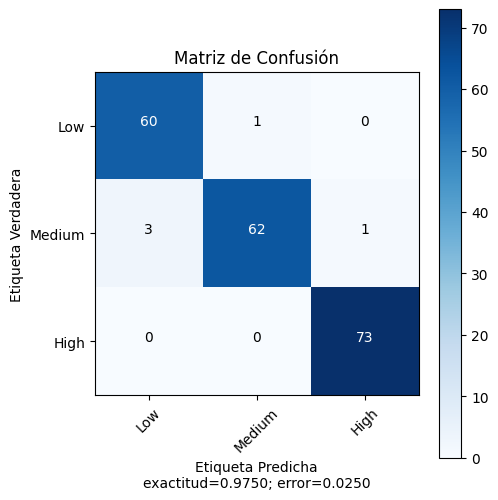

In [ ]:
exactitud = calcular_exactitud(predicciones, Y_test)
print(f'Exactitud multiclase: {exactitud:.4f}')
print("\nClassification Report:\n", classification_report(Y_test, predicciones))

cm = confusion_matrix(Y_test, predicciones)
plot_confusion_matrix(cm, target_names=['Low','Medium','High'])

1.17 Norma gradiente

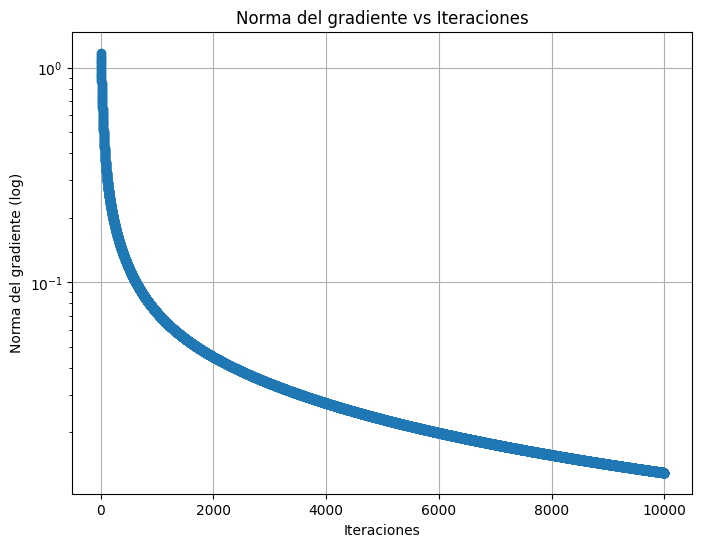

In [ ]:
plt.figure(figsize=(8, 6))
if len(normas_grad) > 0:
    plt.plot(range(1, len(normas_grad) + 1), normas_grad, marker='o')
    plt.yscale('log')
    plt.xlabel("Iteraciones")
    plt.ylabel("Norma del gradiente (log)")
    plt.title("Norma del gradiente vs Iteraciones")
    plt.grid(True)
    plt.show()
else:
    print("No hubo iteraciones registradas para graficar la norma del gradiente.")